# Assignment 5: Multilayer Perceptron (MLP) Model — Public Health
<span style="color: red; font-weight: bold;">Disclaimer: The dataset used in this notebook is synthetic and has been created solely for educational purposes within a machine learning course in social science. It is not intended for use in drawing any medical, political, or other real-world conclusions.</span>

**Course:** Introduction to Machine Learning for Social Science<br>
**Course Code:** CSS5230<br>
**Teacher:** [Sahba Zojaji](https://myweb.cuhk.edu.cn/sahbazojaji/Home/Index)<br>
**University:** The Chinese University of Hong Kong, Shenzhen

## Summary

This notebook provides a demonstration of applying the <u>Multilayer Perceptron (MLP)</u> model on a **synthetic** public health dataset. The dataset includes the following columns: 

1. **ID**: A unique identifier for each individual.
2. **Age**: The age of the individual.
3. **Gender**: The gender of the individual (Male/Female).
4. **BMI**: Body Mass Index, a measure of body fat based on height and weight.
5. **Smoking Status**: The smoking status of the individual (Never, Former, Current).
6. **Exercise Frequency**: The frequency of exercise per week.
7. **Cholesterol Level**: The cholesterol level of the individual.
8. **Blood Pressure**: The blood pressure of the individual.
9. **Health Risk Score**: A calculated score representing the overall health risk of the individual.
10. **Health Risk Category**: The health risk category of the individual (Low, Medium, High).

### Goal:

The goal is to predict health risk categories (for classification) based on features such as age, gender, BMI, smoking status, exercise frequency, cholesterol level, and blood pressure.

## Loading the Dataset

We will load the public health dataset that contains features such as age, gender, BMI, smoking status, exercise frequency, cholesterol level, blood pressure, and <u>health risk category (for classification)</u>.

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

# Load the dataset
data = pd.read_csv('public_health_dataset.csv')

# Display the first few rows of the dataset
data.head()

,ID,Age,Gender,BMI,Smoking Status,Exercise Frequency,Cholesterol Level,Blood Pressure,Health Risk Score,Health Risk Category
0,1,62,Female,22.812775,Former,4,119.690569,104.027015,74.966827,Medium
1,2,65,Female,18.902457,Former,0,151.031562,106.691143,78.305866,Medium
2,3,82,Female,31.286677,Former,0,167.483621,87.811173,95.605578,Medium
3,4,85,Male,23.427027,Former,2,124.839669,91.354148,80.921337,Medium
4,5,85,Female,25.755887,Former,6,192.860153,121.826556,95.150886,Medium


## Data Preprocessing  
Before building the models, we need to preprocess the data. Here's what we'll do:  

1. **Drop Unnecessary Columns**: Remove irrelevant columns to streamline the dataset.
2. **Encode Categorical Variables**: Transform categorical data (e.g., Gender) into numerical form.
3. **Split Data**: Separate features from target variables for classification and regression tasks.
4. **Divide into Training and Testing Sets**: Allocate 80% of data for training, 20% for testing.
5. **Normalize Features**: Scale features to a range of [0, 1] for consistent model performance.

In [4]:
# Drop the ID column as it is not useful for modeling
data = data.drop(columns=['ID'])

# Encode categorical variables (e.g., Gender, Smoking Status) into numerical values
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Smoking Status'] = label_encoder.fit_transform(data['Smoking Status'])

# Separate features (X) and target variables (y_class for classification)
X = data.drop(columns=['Health Risk Category', 'Health Risk Score'])  # Features
y_class = data['Health Risk Category']  # Target for classification

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train_class, y_test_class = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

# Normalize the features using MinMaxScaler to bring all values into the range [0, 1]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **<span style="color:green">Multilayer Perceptron (MLP) Model</span>**
We’ll use MLPClassifier to predict the Health Risk Category.

1. **Model Training**: Initialize and train the MLP model using scaled training data.
2. **Prediction**: Use the trained model to predict class labels on the scaled test data.
3. **Performance Evaluation**: Assess model accuracy and generate a detailed classification report.

In [6]:
# --- Multilayer Perceptron (MLP) Classifier ---
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42, activation='relu', solver='adam')
mlp.fit(X_train_scaled, y_train_class)  # Train the model
y_pred_class_mlp = mlp.predict(X_test_scaled)  # Predict on test data

# Evaluate MLP performance
accuracy_mlp = accuracy_score(y_test_class, y_pred_class_mlp)
print(f"MLP Accuracy: {accuracy_mlp}")

# Classification Report for MLP
print("Classification Report for MLP:")
print(classification_report(y_test_class, y_pred_class_mlp))

MLP Accuracy: 0.98
Classification Report for MLP:
              precision    recall  f1-score   support

        High       1.00      0.95      0.97        76
      Medium       0.97      1.00      0.98       124

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.98      0.98      0.98       200



### Confusion Matrix for MLP

Create a heatmap to visualize the confusion matrix for the MLP model, comparing actual vs. predicted health risk categories.

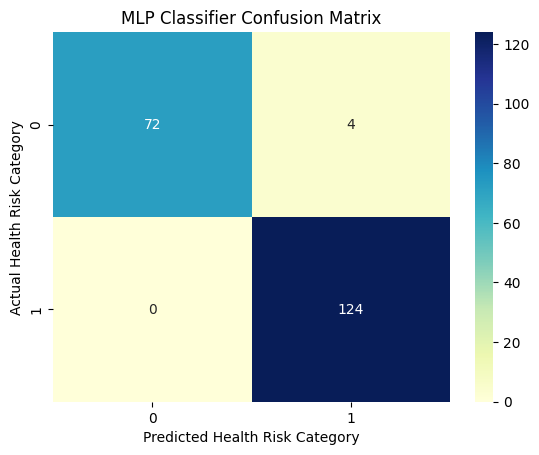

In [15]:
# MLP: Confusion Matrix
sns.heatmap(confusion_matrix(y_test_class, y_pred_class_mlp), annot=True, cmap="YlGnBu", fmt='d')
plt.xlabel("Predicted Health Risk Category")
plt.ylabel("Actual Health Risk Category")
plt.title("MLP Classifier Confusion Matrix")
plt.show()  

### Learning Curve for MLP
Plot the loss curve to visualize how the loss decreases over iterations during the training of the MLP model. This helps in understanding the convergence behavior of the model.

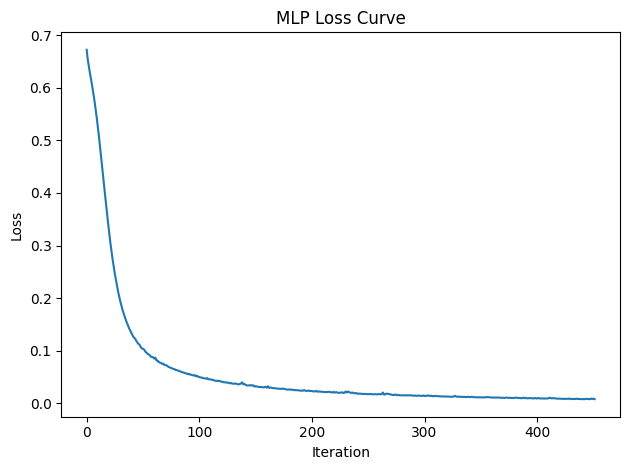

In [19]:
# --- Visualize Learning Curves ---
plt.plot(mlp.loss_curve_)
plt.title("MLP Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

In [21]:
# --- Additional Educational Elements ---
# Explaining the MLP architecture
print("\n--- MLP Architecture ---")
print(f"Number of layers: {len(mlp.coefs_)}")
print(f"Number of neurons in each layer: {[layer.shape[1] for layer in mlp.coefs_]}")
print(f"Activation function: {mlp.activation}")
print(f"Solver: {mlp.solver}")

# Explaining the impact of parameters
print("\n--- Impact of Parameters ---")
print("Hidden Layer Sizes: (100, 50) - This means the MLP has two hidden layers with 100 and 50 neurons respectively.")
print("Activation Function: 'relu' - This is a common activation function that helps introduce non-linearity.")
print("Solver: 'adam' - This is an optimization algorithm that adapts the learning rate for each parameter.")

# Explaining the loss curve
print("\n--- Loss Curve Explanation ---")
print("The loss curve shows how the loss decreases over iterations. A smooth and steadily decreasing curve indicates good convergence.")


--- MLP Architecture ---
Number of layers: 3
Number of neurons in each layer: [100, 50, 1]
Activation function: relu
Solver: adam

--- Impact of Parameters ---
Hidden Layer Sizes: (100, 50) - This means the MLP has two hidden layers with 100 and 50 neurons respectively.
Activation Function: 'relu' - This is a common activation function that helps introduce non-linearity.
Solver: 'adam' - This is an optimization algorithm that adapts the learning rate for each parameter.

--- Loss Curve Explanation ---
The loss curve shows how the loss decreases over iterations. A smooth and steadily decreasing curve indicates good convergence.


# <span style="color:red">MLP Hyperparameter Tuning Assignment (10 points)</span>

## Objective
Explore the impact of various hyperparameters on the performance of the MLP model.

## Instructions:
1. **Hidden Layer Sizes**: Experiment with different architectures for the hidden layers (e.g., [(50,), (100, 50), (200, 100, 50)]).
2. **Activation Function**: Try different activation functions (e.g., ['relu', 'tanh', 'logistic']).
3. **Learning Rate:** Adjust the learning rate for weight updates.

For each combination of hyperparameters:
- Train the MLP model.
- Evaluate the model using the following metrics:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
- Visualize the loss curve to analyze the training behavior.
- Provide the outputs of evaluation metrics, the confusion matrix, and the loss curve for different combinations of hyperparameters in your report.

**At least 2 combinations must be included in your final report.**